In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("Insurance data1.csv")
file.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


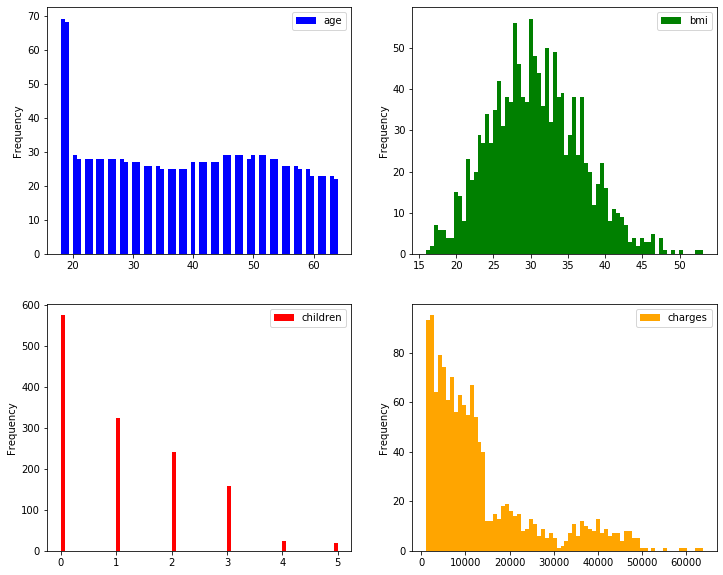

In [3]:
fig, axes = plt.subplots(nrows = 2,ncols =2, figsize=(12,10))
file.plot(kind = 'hist',y= 'age',bins = 70,color="b",ax = axes[0][0])
file.plot(kind = 'hist',y= 'bmi',bins = 70,color="g",ax = axes[0][1])
file.plot(kind = 'hist',y= 'children',bins = 70,color="r",ax = axes[1][0])
file.plot(kind = 'hist',y= 'charges',bins = 70,color="orange",ax = axes[1][1])

In [4]:
file.corr()

,Unnamed: 0,age,bmi,children,charges
Unnamed: 0,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


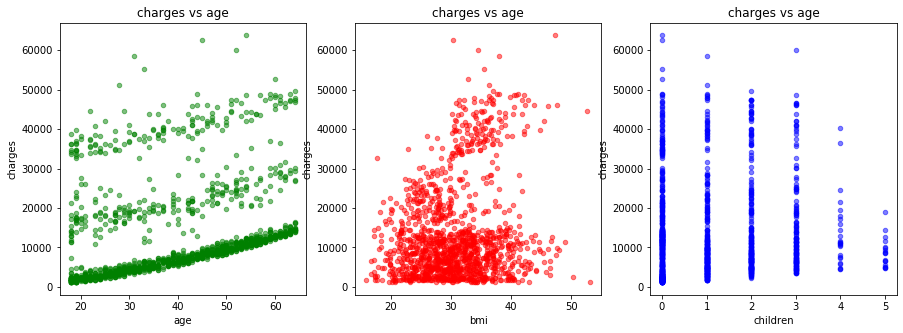

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols=3,figsize=(15,5))
file.plot(kind = 'scatter', x = 'age', y='charges',alpha =0.5,color = 'green',ax =axes[0],title ='charges vs age' )
file.plot(kind = 'scatter', x = 'bmi', y='charges',alpha =0.5,color = 'red',ax =axes[1],title ='charges vs age' )
file.plot(kind = 'scatter', x = 'children', y='charges',alpha =0.5,color = 'blue',ax =axes[2],title ='charges vs age' )
plt.show()

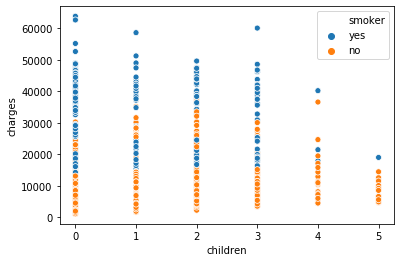

In [5]:
import seaborn as sns
sns.scatterplot(x = 'children', y= 'charges',data = file,hue = 'smoker')

Text(0.5, 1, 'smoker')

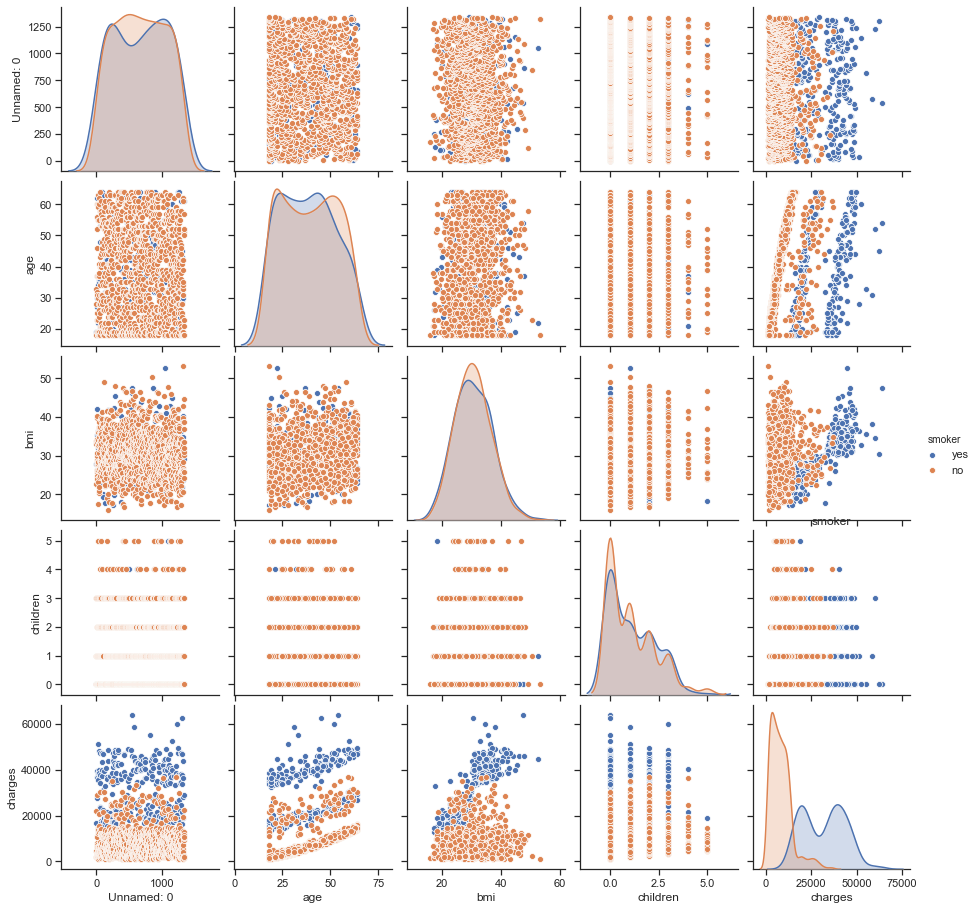

In [7]:
sns.set(style = 'ticks')
sns.pairplot(file, hue = 'smoker')
plt.title("smoker")

In [26]:
file.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
file.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [8]:
file

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
cat_col = ['sex','smoker','region']
num_col = [i for i in file.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'charges']

In [12]:
one_hot = pd.get_dummies(file[cat_col])
file = pd.concat([file[num_col],one_hot],axis =1)
file.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [13]:
x = file.drop(['charges'],axis =1)
y = file.charges

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [20]:
# from sklearn.preprocessing import StandardScaler    #scikit-learn.org
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
multi_Liner_reg = LinearRegression(fit_intercept=False)
multi_Liner_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
polynominal_features = PolynomialFeatures(degree=3)
x_train_poly = polynominal_features.fit_transform(x_train)
x_test_poly = polynominal_features.fit_transform(x_test)

polynominal_reg = LinearRegression(fit_intercept=False)
polynominal_reg.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [17]:
x_train_poly.shape

(1003, 364)

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
Dec_tree_reg = DT(max_depth = 5, random_state=13)
Dec_tree_reg.fit(x_train,y_train)

TypeError: 'DecisionTreeClassifier' object is not callable

In [19]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=400, max_depth=5,random_state=13)
random_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [22]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma = 'auto',kernel = 'linear', C=1000)
support_vector_reg.fit(x_train,y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
a = multi_Liner_reg.predict(x_train)
accu1 = r2_score(y_train,a)
SME = sqrt(mean_squared_error(y_train,a))
print(accu1)
print(SME)

NameError: name 'multi_Liner_reg' is not defined